In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
with open('cdnow1.txt','w') as f1:
    with open('cdnow.txt') as f:
        for i in f.readlines():
#             print(' '.join(i.split()))
            f1.write(' '.join(i.split())+'\n')
            


In [140]:
df = pd.read_csv('cdnow1.txt', sep=' ',header=None, names=['id','time', 'cnt', 'price'],
                 dtype={'id':'str','time':'str','cnt':'int64','price':'float64'})

In [141]:
print(df.dtypes)
df.head()

id        object
time      object
cnt        int64
price    float64
dtype: object


,id,time,cnt,price
0,00001,19970101,1,11.77
1,00002,19970112,1,12.00
2,00002,19970112,5,77.00
3,00003,19970102,2,20.76
4,00003,19970330,2,20.76


In [142]:
df['dt']=pd.DatetimeIndex(df.time)
df['money'] = df.cnt * df.price
df =df.set_index('dt')
df.describe()

,cnt,price,money
count,69659.000000,69659.000000,69659.000000
mean,2.410040,35.893648,162.834814
std,2.333924,36.281942,864.312155
min,1.000000,0.000000,0.000000
25%,1.000000,14.490000,14.770000
50%,2.000000,25.980000,48.960000
75%,3.000000,43.700000,125.730000
max,99.000000,1286.010000,127314.990000


按每天的销售额随时间的变化规律来看，有几天异常的大

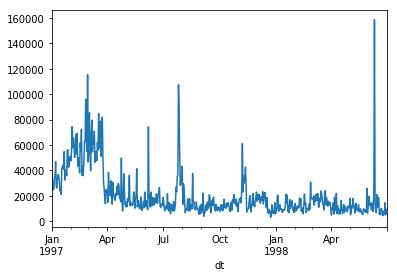

In [148]:
df.resample('D')['money'].sum().plot()
# df.resample('M', kind='period')['money'].sum().plot()


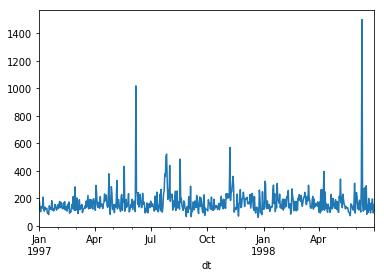

In [144]:
df.resample('D')['money'].mean().plot()

#从每日均笔销售额来看，1997-05,1998-06月均有销售额异常大的情况，正常日均每笔销售额应该在200以下,1997-06-07 日均平均笔销售额值为1016.7，1998-06-10日平均笔销售额1497.6
后面发现price更像是销售额

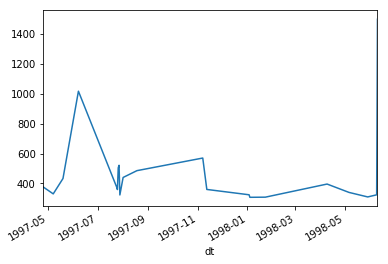

In [152]:
df.resample('D')['money'].mean()[df.resample('D')['money'].mean()>300].plot()

In [184]:
df['month'] = df.time.apply(lambda x: x[:4] + '-' + x[4:6])
M = df.month.unique()
M

array(['1997-01', '1997-03', '1997-04', '1997-11', '1998-05', '1997-08',
       '1997-12', '1997-02', '1997-05', '1997-06', '1997-07', '1997-09',
       '1998-01', '1997-10', '1998-03', '1998-06', '1998-02', '1998-04'],
      dtype=object)

按月均价来看，整体月均价基本都在14-15之前，1997年前三个月整体月均价格叫较高，超过15

month
1997-01    15.402769
1997-02    15.231733
1997-03    15.029446
1997-04    14.680285
1997-05    14.836192
1997-06    14.846716
1997-07    15.014006
1997-08    15.103006
1997-09    14.304207
1997-10    14.473766
1997-11    14.778372
1997-12    14.892077
1998-01    14.542778
1998-02    14.437633
1998-03    14.664265
1998-04    14.100813
1998-05    14.478821
1998-06    14.395555
Name: price_1, dtype: float64


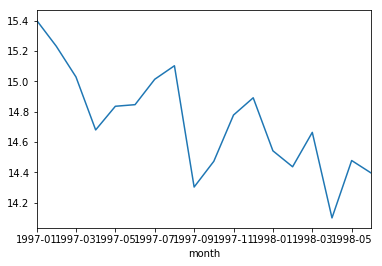

In [205]:
df2 = df
df2 = df2.set_index('month')
df3 = df2.groupby('month')['cnt', 'price'].sum()
df3['price_1'] = df3.price/ df3.cnt
print(df3.price_1)
df3['price_1'].plot()

month
1997-01    19416
1997-02    24921
1997-03    26159
1997-04     9729
1997-05     7275
1997-06     7301
1997-07     8131
1997-08     5851
1997-09     5729
1997-10     6203
1997-11     7812
1997-12     6418
1998-01     5278
1998-02     5340
1998-03     7431
1998-04     4697
1998-05     4903
1998-06     5287
Name: cnt, dtype: int64


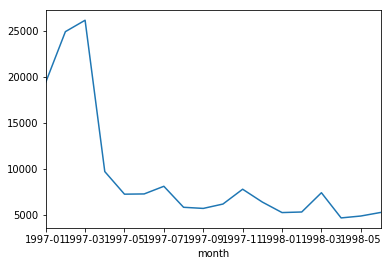

In [207]:
print (df3.cnt)
df3.cnt.plot()

每月销售次数来看：1997年一季度销售量最大，尤其前3个月，超过每个月销量均超过19000，1997年一季度之后每月销售量均低于10000,由于均价变动不大，因此销售额规律同销售次数

In [223]:
print(len(df2.id.value_counts()[df2.id.value_counts() >1])/len(df2.id.unique()))
print(len(df2.id.value_counts()[df2.id.value_counts() >2])/len(df2.id.unique()))
print(len(df2.id.value_counts()[df2.id.value_counts() >3])/len(df2.id.unique()))
print(len(df2.id.value_counts()[df2.id.value_counts() >4])/len(df2.id.unique()))
print(len(df2.id.value_counts()[df2.id.value_counts() >5])/len(df2.id.unique()))

0.4947815019092066
0.3217225286380993
0.22766228256257956
0.16652524395417903
0.12431056427662282


在cdnow 消费的人群中，49.5的有复购行为, 12.4%的用户有过5次以上的购买行为

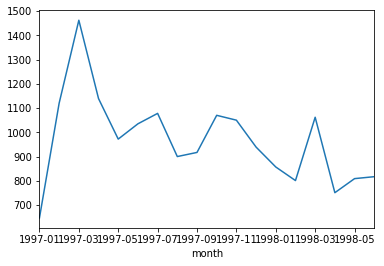

In [249]:
# df2.id.value_counts()[df2.id.value_counts() >2].index
df2.head()
df2.groupby(['month', 'id']).count().loc[(slice(None),df2.id.value_counts()[df2.id.value_counts() >10].index),:].reset_index(level=1)\
.groupby('month')['cnt'].sum().plot()

通过对整个时间段的购买客户购买情况进行分析，发现当客户购买次数超过15次时，按月份来看，这些客户的购买没有什么区别，说明忠实客户后期仍然会继续选择购买；
当客户购买次数在2-10次时，这些复购的客户均是在1997-03月份的购买次数最大，之后并不能很好的留存下来，而1997-03单笔销售价格并无明显下降。可能是当时处于市场垄断地位或者进行了促销，类似买1送1的活动，导致销量大幅增加，而价格相比较之后的月份并无明显变化

参考思路-分析:

1. 销售静态分析:单笔订单购买数量,平均数量为2.4，最大数量99个
单笔订单金额,平均金额为35.89，最大金额1286.01


In [284]:
df2.price.mean()

35.8936480569691

2. 销售动态分析：
a.订单趋势分析：1997年一季度订单增长明显，之后自从1997-03-26订单量从每日超过300单骤降至150以内
b.金额趋势同订单趋势一致
1997-10-08 日均价最低，为12.04元

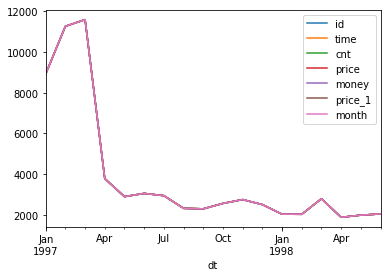

In [298]:
df.resample('M').count().plot()

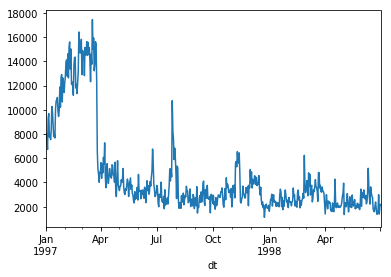

In [306]:
df.resample('D')['price'].sum().plot()

In [314]:
df.resample('D')['price_1'].mean()[df.resample('D')['price_1'].mean()<13]

dt
1997-10-08    12.041432
Freq: D, Name: price_1, dtype: float64

In [317]:
df.loc['1997-10-08'][df.loc['1997-10-08','price_1'] <11]

,id,time,cnt,price,money,price_1,month
dt,,,,,,,
1997-10-08,02484,19971008,2,14.98,29.96,7.490000,1997-10
1997-10-08,03419,19971008,1,4.99,4.99,4.990000,1997-10
1997-10-08,07145,19971008,2,12.98,25.96,6.490000,1997-10
1997-10-08,07145,19971008,1,10.49,10.49,10.490000,1997-10
1997-10-08,07477,19971008,5,45.45,227.25,9.090000,1997-10
1997-10-08,07838,19971008,2,15.98,31.96,7.990000,1997-10
1997-10-08,09172,19971008,5,31.95,159.75,6.390000,1997-10
1997-10-08,09289,19971008,1,9.49,9.49,9.490000,1997-10
1997-10-08,10655,19971008,1,10.49,10.49,10.490000,1997-10


3.用户消费行为静态分析
A.用户购买数量分析
    a.累计购买数量分析:购买最多前8位用户购买订单超过100单
    b.累计购买最多的前4个用户占总订单数的超过1%
    c.最大单笔购买数量为99
B.用户购买金额分布同数量分布
C.同数量分布

In [326]:
df2.groupby([ 'id'])['cnt'].count().sort_values(ascending =False)

id
14048    217
07592    201
07983    149
22061    143
03049    117
00499    110
19597    109
07145    102
02484     80
10079     67
04459     65
07931     62
00710     61
12367     60
17104     58
19339     56
06057     55
01722     52
08035     52
13167     50
01077     49
20917     49
20873     49
22013     48
12476     47
01760     47
15562     46
00398     44
12860     42
09908     42
        ... 
17161      1
17164      1
08795      1
17165      1
17166      1
08819      1
08820      1
08821      1
08834      1
17123      1
08843      1
08842      1
08841      1
17127      1
08839      1
08838      1
08837      1
08836      1
17130      1
17140      1
17131      1
17133      1
17135      1
17136      1
17137      1
08826      1
17138      1
17139      1
08823      1
00001      1
Name: cnt, Length: 23570, dtype: int64

In [327]:
df2.groupby([ 'id'])['cnt'].count().sort_values(ascending =False)/len(df2)

id
14048    0.003115
07592    0.002885
07983    0.002139
22061    0.002053
03049    0.001680
00499    0.001579
19597    0.001565
07145    0.001464
02484    0.001148
10079    0.000962
04459    0.000933
07931    0.000890
00710    0.000876
12367    0.000861
17104    0.000833
19339    0.000804
06057    0.000790
01722    0.000746
08035    0.000746
13167    0.000718
01077    0.000703
20917    0.000703
20873    0.000703
22013    0.000689
12476    0.000675
01760    0.000675
15562    0.000660
00398    0.000632
12860    0.000603
09908    0.000603
           ...   
17161    0.000014
17164    0.000014
08795    0.000014
17165    0.000014
17166    0.000014
08819    0.000014
08820    0.000014
08821    0.000014
08834    0.000014
17123    0.000014
08843    0.000014
08842    0.000014
08841    0.000014
17127    0.000014
08839    0.000014
08838    0.000014
08837    0.000014
08836    0.000014
17130    0.000014
17140    0.000014
17131    0.000014
17133    0.000014
17135    0.000014
17136    0.000014
17137  

In [328]:
df2.cnt.max()

99

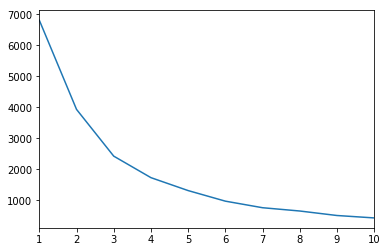

In [278]:
# fig = plt.figure()  # 创建画布
# ax = fig.add_subplot(111)   # 创建子图。 画布分割成1行1列，从左到右从上到下第1幅
# print(df2.reset_index().set_index('id').groupby('id')['cnt'].sum().value_counts()[:])
df2.reset_index().set_index('id').groupby('id')['cnt'].sum().value_counts()[:10].plot()
# ax.hist(df2.reset_index().set_index('id').groupby('id')['cnt'].sum().value_counts(), bins=10, color='green', alpha=0.6)  # bins控制分组，appha设置参数点的透明度
# df2.groupby(['month', 'id']).count().loc[(slice(None),df2.id.value_counts()[df2.id.value_counts() >10].index),:].reset_index(level=1)\
# .groupby('month')['cnt'].sum().plot()

df.resample('M', kind='period').sum().plot()

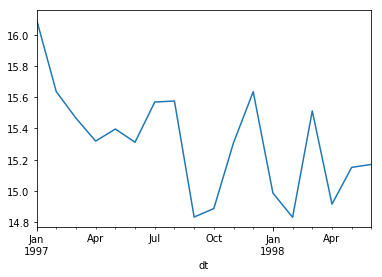

In [167]:
df['price_1'] = df2.price/df2.cnt
df.resample('M', kind='period')['price_1'].mean().plot()

1.按月均价来看，整体月均价基本都在14-15之前，1997年前三个月整体月均价格叫较高，超过15
2.每月销售次数来看：1997年一季度销售量最大，尤其前3个月，超过每个月销量均超过19000，1997年一季度之后每月销售量均低于10000,由于均价变动不大，因此销售额规律同销售次数
3.在cdnow 消费的人群中，49.5的有复购行为, 12.4%的用户有过5次以上的购买行为
4.通过对整个时间段的购买客户购买情况进行分析，发现当客户购买次数超过15次时，按月份来看，这些客户的购买没有什么区别，说明忠实客户后期仍然会继续选择购买；
当客户购买次数在2-10次时，这些复购的客户均是在1997-03月份的购买次数最大，之后并不能很好的留存下来，而1997-03单笔销售价格并无明显下降。可能是当时处于市场垄断地位或者进行了促销，类似买1送1的活动，导致销量大幅增加，而价格相比较之后的月份并无明显变化

1. 销售静态分析:单笔订单购买数量,平均数量为2.4，最大数量99个
单笔订单金额,平均金额为35.89，最大金额1286.01

2. 销售动态分析：
a.订单趋势分析：1997年一季度订单增长明显，之后自从1997-03-26订单量从每日超过300单骤降至150以内
b.金额趋势同订单趋势一致
1997-10-08 日均价最低，为12.04元

3.用户消费行为静态分析
A.用户购买数量分析
    a.累计购买数量分析:购买最多前8位用户购买订单超过100单
    b.累计购买最多的前4个用户占总订单数的超过1%
    c.最大单笔购买数量为99
B.用户购买金额分布同数量分布
C.同数量分布